In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:
train=df1[0:300]
test=df1[300:]

In [7]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [8]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
import xgboost as xgb
xgbst_reg=xgb.XGBRegressor()

In [12]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
xgbst_reg.score(X_train,y_train)

0.9999986443810006

In [14]:
xgbst_reg.score(X_test,y_test)

0.6212885360356525

In [15]:
xgbst_reg.score(X_,y_)

0.3280493840907064

In [16]:
y_pred_1=xgbst_reg.predict(X_)

In [17]:
from sklearn import metrics

In [18]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 31690.65555446332
MAE: 25420.173406066893


In [19]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

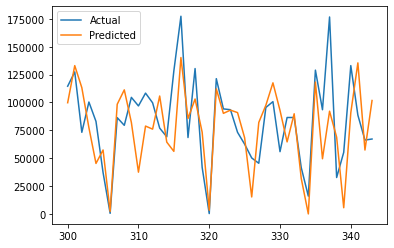

In [20]:
comp.plot()

In [21]:
comp['Error']=comp['Actual']-comp['Predicted']

In [22]:
comp

,Actual,Predicted,Error
300,114534.21,99699.585938,14834.624063
301,127412.10,133039.531250,-5627.431250
302,73107.94,113230.843750,-40122.903750
303,100335.70,77287.984375,23047.715625
304,82920.44,45144.585938,37775.854063
305,36992.00,57243.062500,-20251.062500
306,326.00,1992.148926,-1666.148926
307,86287.17,98319.007812,-12031.837813
308,79380.38,111259.750000,-31879.370000
309,104509.01,81949.921875,22559.088125


# Hyperparamter Optimization

In [41]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [94]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3],
               'max_depth': randint(5,10),
               'subsample': [0.5,0.6,0.7,0.8,0.9],
               'min_child_weight': randint(1,10)}


In [95]:
# Model for tuning

base_learner=xgb.XGBRegressor()


In [96]:
# Tuning 

# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_root_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [97]:
tuned_model.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.8s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DE27EED940>,
                                        'min_child_weight': <

In [98]:
tuned_model.best_params_

{'learning_rate': 0.005,
 'max_depth': 9,
 'min_child_weight': 7,
 'n_estimators': 677,
 'subsample': 0.6}

In [99]:
tuned_model.best_score_

-38730.74921802711

In [100]:
# Best model

best_model=xgb.XGBRegressor(learning_rate= 0.005,max_depth=9,min_child_weight=7,n_estimators=677,subsample=0.6)

In [101]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=9,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=677, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
best_model.score(X_train,y_train)

0.8387368896576157

In [103]:
best_model.score(X_test,y_test)

0.7334571005900727

In [104]:
best_model.score(X_,y_)

0.5334572140395858

In [106]:
y_pred_2=best_model.predict(X_)

In [107]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_2))

RMSE: 26406.344458802283
MAE: 19859.418634810016


In [108]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pred_2})

<AxesSubplot:>

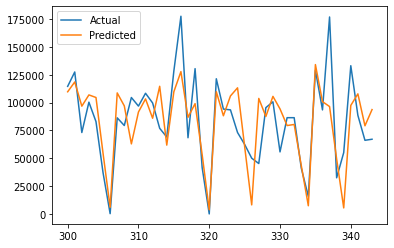

In [109]:
comp_2.plot()

In [110]:
comp_2['Error']=comp_2['Actual']-comp_2['Predicted']

In [111]:
comp_2

,Actual,Predicted,Error
300,114534.21,109646.476562,4887.733438
301,127412.10,118452.875000,8959.225000
302,73107.94,96758.304688,-23650.364687
303,100335.70,106845.273438,-6509.573438
304,82920.44,104532.992188,-21612.552187
305,36992.00,54359.910156,-17367.910156
306,326.00,6022.104492,-5696.104492
307,86287.17,108630.929688,-22343.759688
308,79380.38,97019.500000,-17639.120000
309,104509.01,62919.078125,41589.931875
